# Capstone 1- Data Story
 
## Dataset: World Bank Gender Statistics 
 
### Investigation Questions: 
- How does contraceptive use (and other issues around female autonomy or abuse) correlate with financial, health,  education or employment statistics?
- How does female education correlate with life expectancy and GDP? Male education?
- How does male education correlate with abuse or control of women? 


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

#wrangled data imported into a pandas dataframe
df = pd.read_csv('~/Documents/Repository/Capstone-1_WorldBank_GenderData/wrangled_data.csv')

Populating the interactive namespace from numpy and matplotlib


In [2]:
#filter df to only rows from 2014 then saving as a new data 
df2014 = df[df.year == 2014]
#filter df to only rows from 2000 and 2014 for some comparison plots
dfcomp = df[(df.year == 2000) | (df.year==2014)]
#filter just to economic groups
groups= df2014[(df2014['Country.Name'] =='Early-demographic dividend')|(df2014['Country.Name']=='Fragile and conflict affected situations')|(df2014['Country.Name']=='Heavily indebted poor countries (HIPC)')|(df2014['Country.Name']=='High Income')|(df2014['Country.Name']=='Late-demographic dividend')|(df2014['Country.Name']=='Least developed countries: UN classification')|(df2014['Country.Name']=='Low & middle income')|(df2014['Country.Name']=='Low income')|(df2014['Country.Name']=='Lower middle income')|(df2014['Country.Name']=='Lower middle income')|(df2014['Country.Name']== 'OECD members')|(df2014['Country.Name']== 'Post-demographic dividend')|(df2014['Country.Name']== 'Pre-demographic dividend')|(df2014['Country.Name']== 'Upper middle income')|(df2014['Country.Name']== 'World')]


In [4]:
#Groups dataframe cleaned to retain only rows with values for contraceptive use
bcg = groups[pd.notnull(groups['Contraceptive prevalence, any methods (% of women ages 15-49)'])]
#Original entire df filtered to only have rows with values for Contraceptive use
bcall = df[pd.notnull(df['Contraceptive prevalence, any methods (% of women ages 15-49)'])]

## Contraceptive use (ANY method) vs Maternal Mortality rate

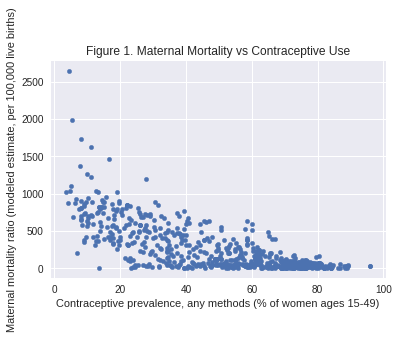

In [18]:
df.plot(x= 'Contraceptive prevalence, any methods (% of women ages 15-49)', y ='Maternal mortality ratio (modeled estimate, per 100,000 live births)', kind ='scatter')
sns.plt.title('Figure 1. Maternal Mortality vs Contraceptive Use')
savefig('BCmatdeath.png')

## There appears to be a negative correlation between contraceptive use and maternal mortality.

# A clear Negative correlation was found between Contraceptive use and Adolescent fertility rate

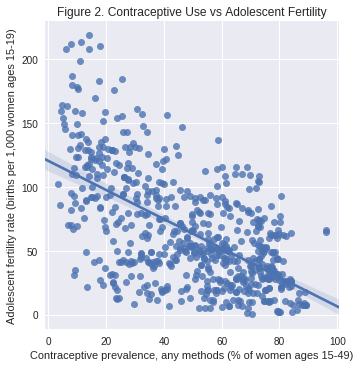

In [17]:
q = sns.FacetGrid(bcall, size=5)  
q.map(sns.regplot, "Contraceptive prevalence, any methods (% of women ages 15-49)", "Adolescent fertility rate (births per 1,000 women ages 15-19)")  
sns.plt.title('Figure 2. Contraceptive Use vs Adolescent Fertility')
savefig('BCteen.png')

## There is a clear positive correlation between Use of Contraception and Life Expectancy

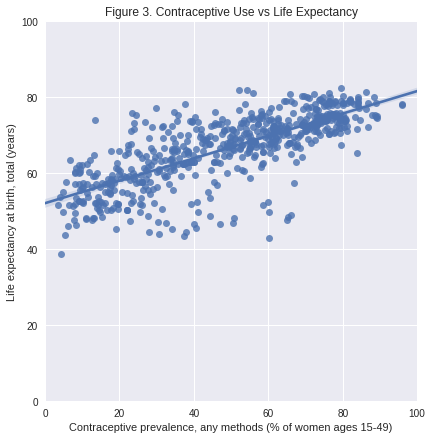

In [16]:
#Regression plot of 
b = sns.FacetGrid(df, size=6)  
b.map(sns.regplot, "Contraceptive prevalence, any methods (% of women ages 15-49)", "Life expectancy at birth, total (years)", "Adolescent fertility rate (births per 1,000 women ages 15-19)")  
plt.xlim(0, 100)  
plt.ylim(0, 100)
sns.plt.title('Figure 3. Contraceptive Use vs Life Expectancy')
savefig('BClife.png')

## Countries with the highest ratios of Maternal Mortality are concentrated in Africa

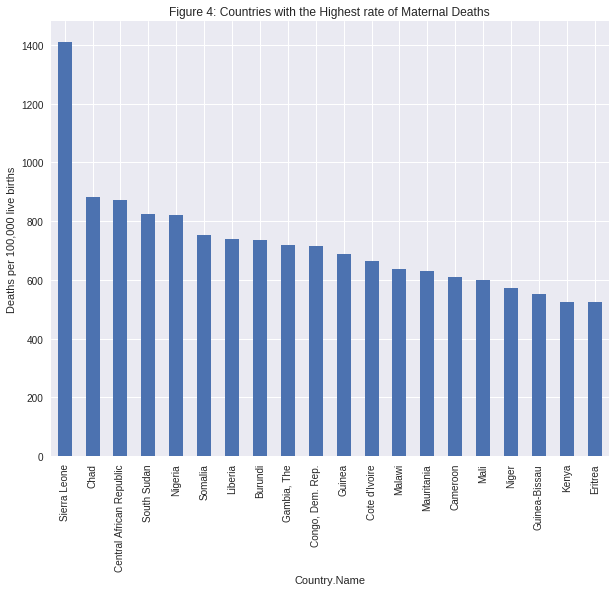

In [15]:
#Find countries with the highest ratio of Materal Deaths in 2014
countryindex= df2014[(df2014['Country.Name'] != 'Pre-demographic dividend') & (df2014['Country.Name'] != 'Sub-Saharan Africa') & (df2014['Country.Name'] != 'Sub-Saharan Africa (IDA & IBRD)') & (df2014['Country.Name'] != 'Sub-Saharan Africa (excluding high income)')]
countryindex = countryindex.set_index(['Country.Name'])
ax = countryindex['Maternal mortality ratio (modeled estimate, per 100,000 live births)'].sort_values(ascending = False).head(20).plot(kind ='bar', figsize=(10,8), title = 'Figure 4: Countries with the Highest rate of Maternal Deaths')
ax.set_ylabel("Deaths per 100,000 live births")
savefig('MDratioCountries.png')

## Maternal Mortality Ratio of Economic Groups

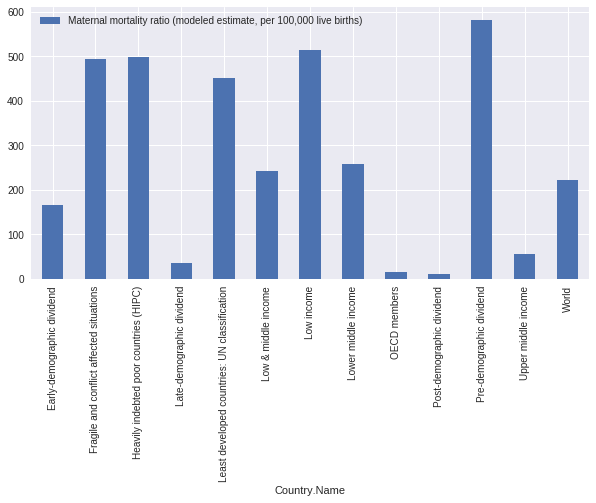

In [7]:
#bar plot of Maternal death ratio in 2014 within grouped catagories
groups.plot(x= 'Country.Name', y='Maternal mortality ratio (modeled estimate, per 100,000 live births)', kind = 'bar', figsize=(10,5))


## Maternal Mortality ratio of regional groups
### Shows that Sub-Saharan in fact has the highest rate by far

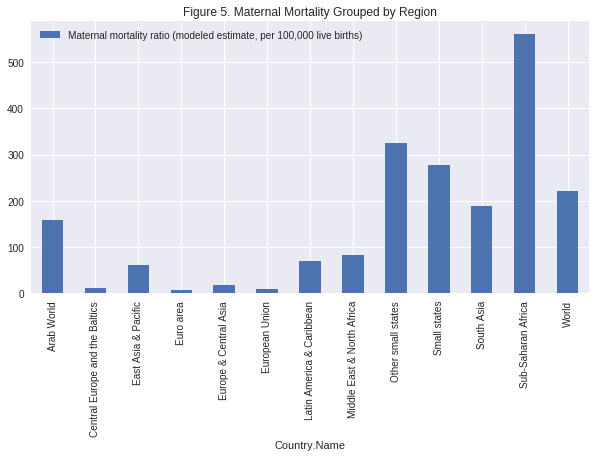

In [14]:
#filter just to regional groups
groups14= df2014[(df2014['Country.Name'] =='Arab World')|(df2014['Country.Name']=='Central Europe and the Baltics')|(df2014['Country.Name']=='East Asia & Pacific')|(df2014['Country.Name']=='Euro area')|(df2014['Country.Name']=='Europe & Central Asia')|(df2014['Country.Name']=='European Union')|(df2014['Country.Name']=='Small states')|(df2014['Country.Name']=='Latin America & Caribbean')|(df2014['Country.Name']=='Middle East & North Africa')|(df2014['Country.Name']=='Other small states')|(df2014['Country.Name']== 'South Asia')|(df2014['Country.Name']== 'Sub-Saharan Africa')|(df2014['Country.Name']== 'World')]

#bar plot of Maternal death ratios in 2014 within regional catagories
c
savefig('MDRregions.png')

## Sub-Saharn Africa has the highest rate of Adolescent fertility (may be related to Maternal mortality rate)

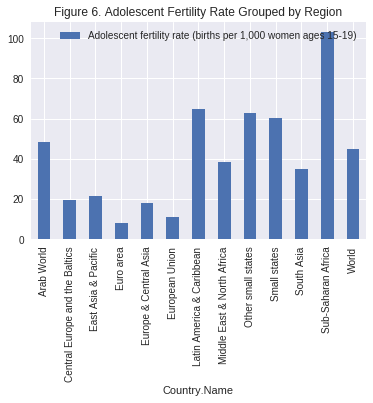

In [13]:
groups14.plot(x= 'Country.Name', y = 'Adolescent fertility rate (births per 1,000 women ages 15-19)', kind = 'bar')
sns.plt.title('Figure 6. Adolescent Fertility Rate Grouped by Region')
savefig('TeenRegion.png')

## The mean percent of female legislators is well below 50%, somewhere around 35%

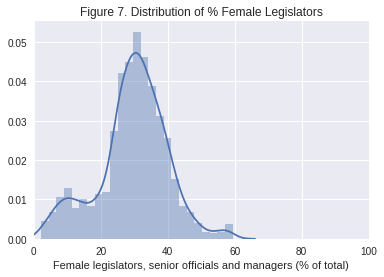

In [20]:
#distribution plot to look at % of female legistators
legi = sns.distplot(df['Female legislators, senior officials and managers (% of total)'].dropna(), bins=25)
sns.plt.title('Figure 7. Distribution of % Female Legislators')
legi.set(xlim=(0, 100))
savefig('FemaleLegi.png')

## It's unclear if there is an interaction between Public education spending and Adolescent fertility rates

(0, 300)

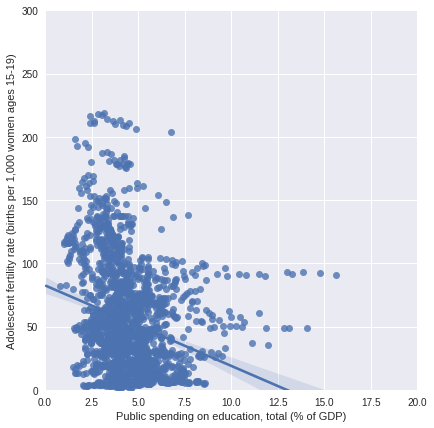

In [123]:
#Regression plot of Public education spending vs Teen pregnancy rates
b = sns.FacetGrid(df, size=6)  
b.map(sns.regplot, "Public spending on education, total (% of GDP)", "Adolescent fertility rate (births per 1,000 women ages 15-19)")  
plt.xlim(0, 20)  
plt.ylim(0, 300)

## Education Spending vs Contraceptive Use

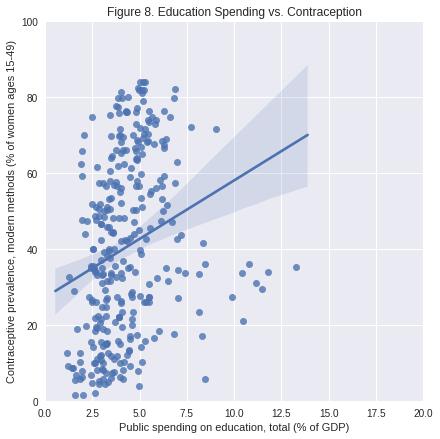

In [15]:
#Regression plot of Public education spending vs Contraceptive prevalence
b = sns.FacetGrid(df, size=6)  
b.map(sns.regplot, "Public spending on education, total (% of GDP)", "Contraceptive prevalence, modern methods (% of women ages 15-49)")  
plt.xlim(0, 20)  
plt.ylim(0, 100)
sns.plt.title('Figure 8. Education Spending vs. Contraception')
savefig('edubc.png')

## When isolating 2000 vs 2014, the correlation appears to change from negative to positive. There must be other mitigating factors.

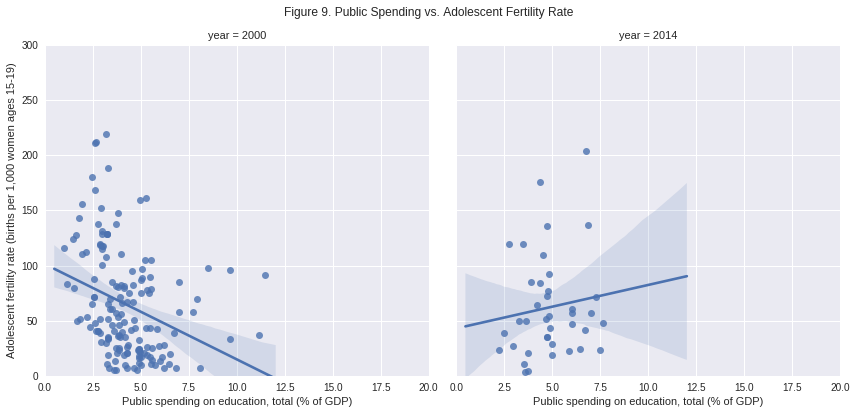

In [30]:
#Two regressieon plots looking at Public education spending vs Adolescent birth rate in 2000 and 2014
g = sns.FacetGrid(dfcomp, col="year", size=6)  
g.map(sns.regplot, "Public spending on education, total (% of GDP)", "Adolescent fertility rate (births per 1,000 women ages 15-19)")  
plt.xlim(0, 20)  
plt.ylim(0, 300)  
sns.plt.suptitle('Figure 9. Public Spending vs. Adolescent Fertility Rate')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
savefig('edubcyear.png')

## An attempt to look at how the % of females earning Bachelor's degrees has changed over time. Further analysis/visualization is needed.

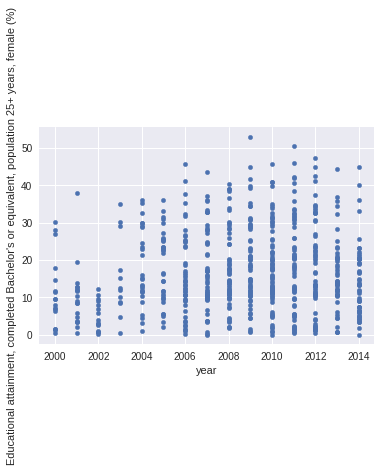

In [134]:
df.plot(x='year', y= 'Educational attainment, completed Bachelor\'s or equivalent, population 25+ years, female (%)', kind = 'scatter')

## There appears to be a negative correlation between Female Bachelor's degree achievement and Adolescent fertility rates that has developed over the last few years, but more work is needed to discover the extent of that correlation.

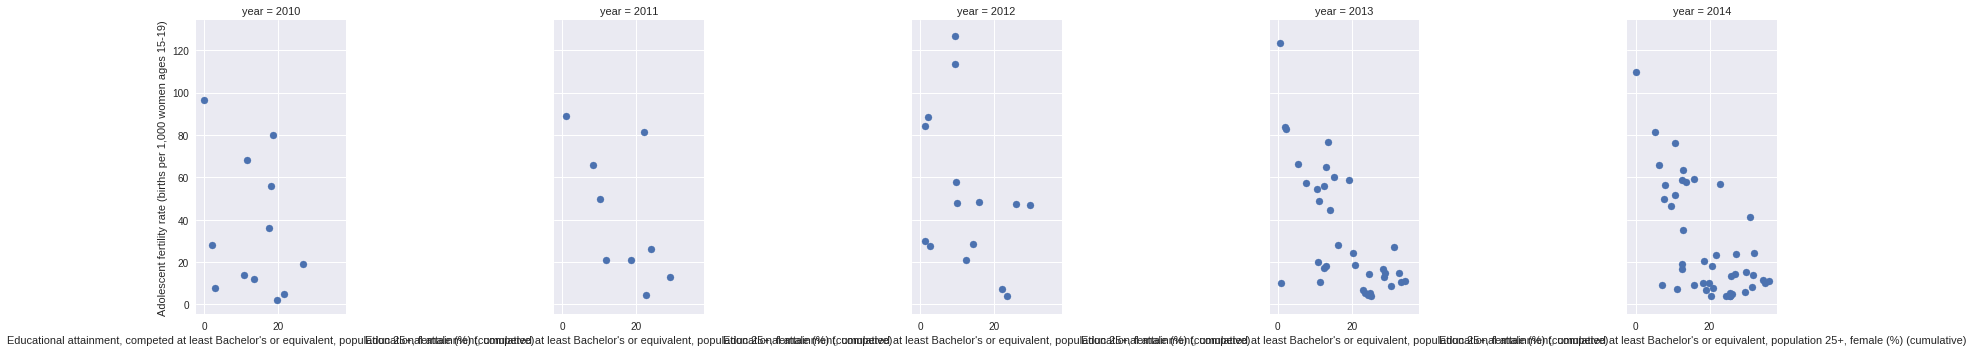

In [135]:
#Scatter plots of Female Bachelor's degree achievement vs Adolescent Fertility Rate in years 2010 - 2014
df4 = df[pd.notnull(df['Educational attainment, competed at least Bachelor\'s or equivalent, population 25+, female (%) (cumulative)'])]
df5 = df4[df4.year > 2009] #restrict to years after 2009
p = sns.FacetGrid(df5, col="year", size=5)  
p.map(plt.scatter, "Educational attainment, competed at least Bachelor\'s or equivalent, population 25+, female (%) (cumulative)", "Adolescent fertility rate (births per 1,000 women ages 15-19)")  


## An attempt to look at how Contraceptive prevalence has changed over time. Further analysis/visualization is needed.

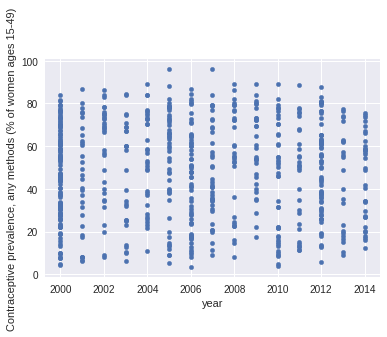

In [33]:
df.plot(x='year', y = 'Contraceptive prevalence, any methods (% of women ages 15-49)', kind = 'scatter')

## On a regional basis, it does not appear that any regions have significantly increased their Public education spending percentage over time.

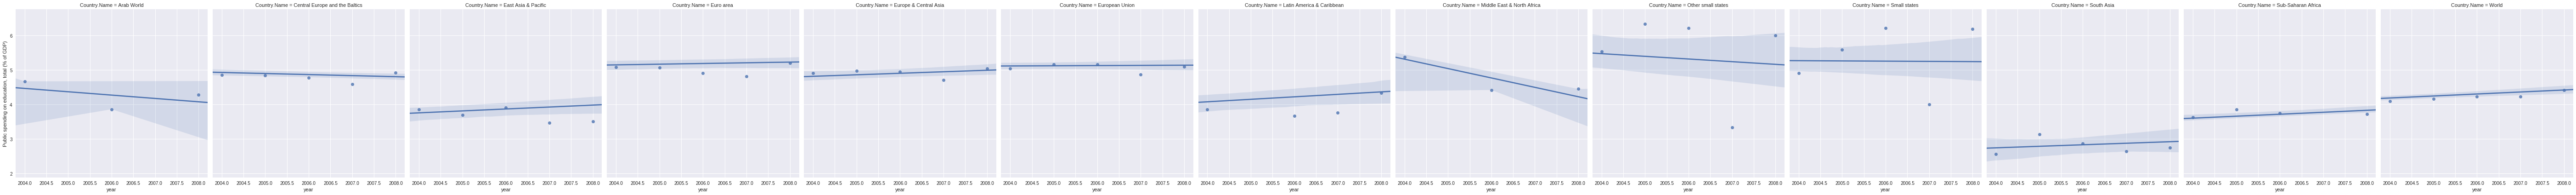

In [34]:
#filter df down to regional groupings
groups= df[(df['Country.Name'] =='Arab World')|(df['Country.Name']=='Central Europe and the Baltics')|(df['Country.Name']=='East Asia & Pacific')|(df['Country.Name']=='Euro area')|(df['Country.Name']=='Europe & Central Asia')|(df['Country.Name']=='European Union')|(df['Country.Name']=='Small states')|(df['Country.Name']=='Latin America & Caribbean')|(df['Country.Name']=='Middle East & North Africa')|(df['Country.Name']=='Other small states')|(df['Country.Name']== 'South Asia')|(df['Country.Name']== 'Sub-Saharan Africa')|(df['Country.Name']== 'World')]

ed = sns.FacetGrid(groups, col="Country.Name", size=6)  
ed.map(sns.regplot, "year", "Public spending on education, total (% of GDP)")  


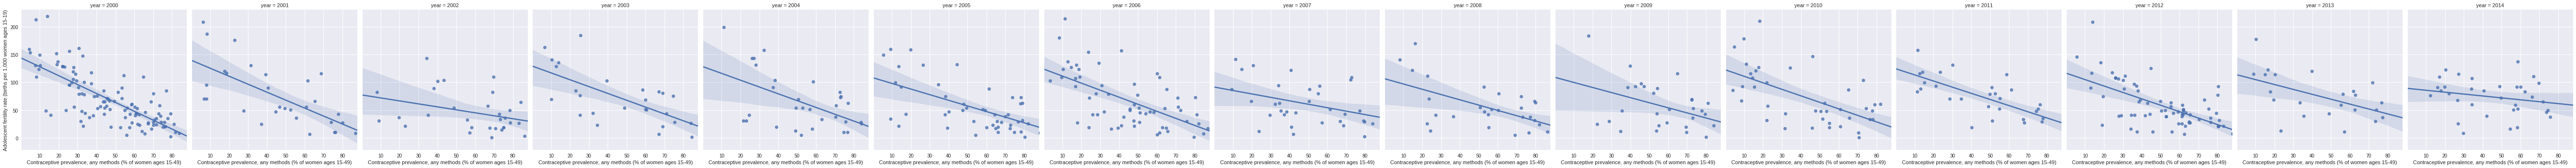

In [37]:
#regression plots looking at Contraceptive use vs. Adolescent fertility rate, broken up by year

q = sns.FacetGrid(bcall, col="year", size=5)  
q.map(sns.regplot, "Contraceptive prevalence, any methods (% of women ages 15-49)", "Adolescent fertility rate (births per 1,000 women ages 15-19)")  


### It seems in the last few years, the correslation has become less strong.

## Only a slight positive correlation was found between GDP and use of Contraception, broken down by year

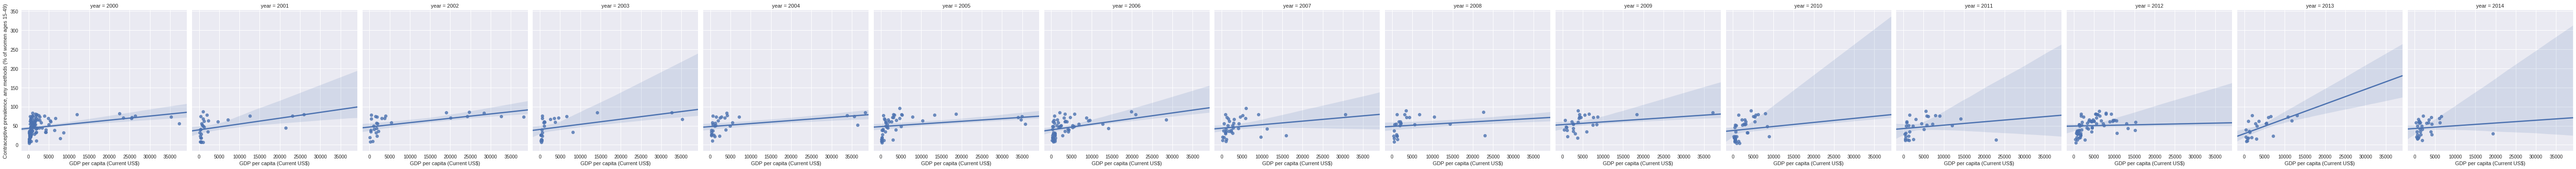

In [38]:
q = sns.FacetGrid(bcall, col="year", size=5)  
q.map(sns.regplot, "GDP per capita (Current US$)", "Contraceptive prevalence, any methods (% of women ages 15-49)")  


# No obvious correlation found, or only a slight one, between GDP and Contraceptive use when broken down by region

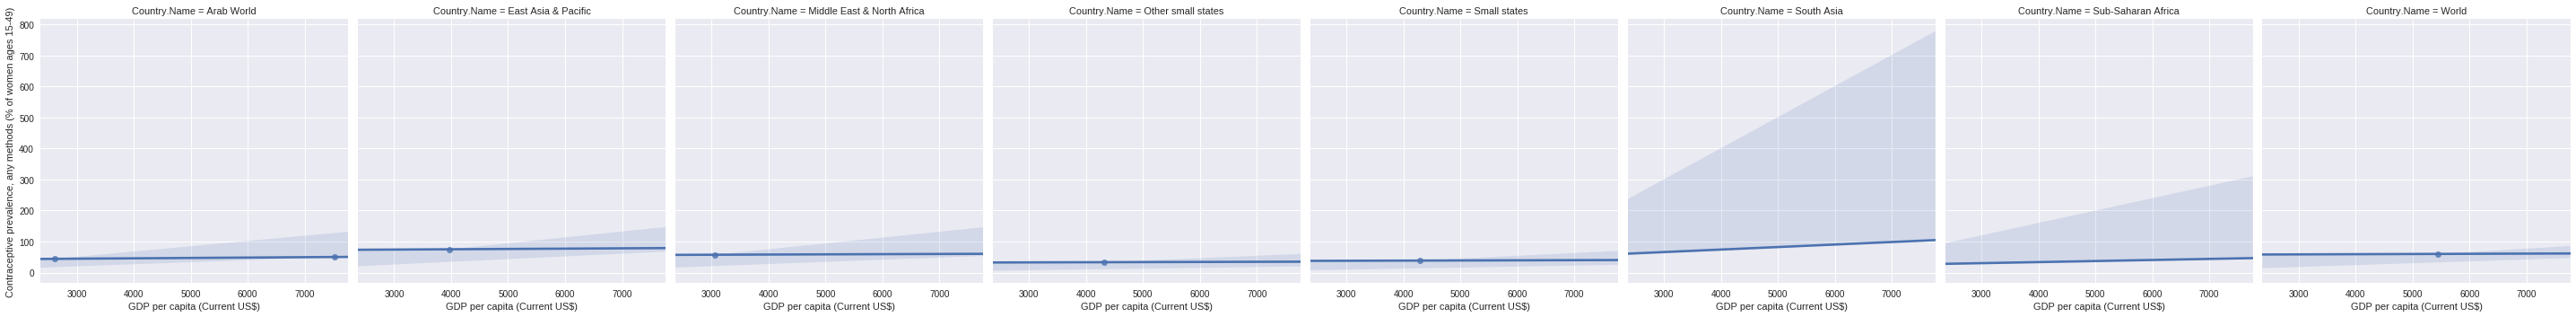

In [39]:
q = sns.FacetGrid(bcg, col="Country.Name", size=5)  
q.map(sns.regplot, "GDP per capita (Current US$)", "Contraceptive prevalence, any methods (% of women ages 15-49)")  


## There is a clear correlation between the decision maker of a woman's health care and the use of Contraception (any method)

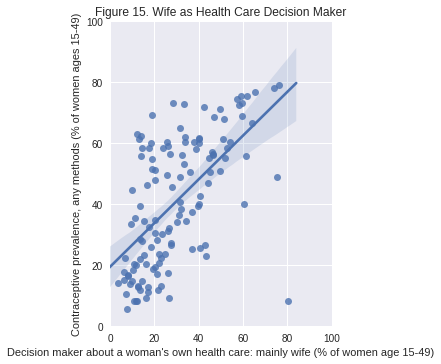

In [51]:
#Decision made by wife
w = sns.FacetGrid(bcall, size=5)  
w.map(sns.regplot, "Decision maker about a woman's own health care: mainly wife (% of women age 15-49)", "Contraceptive prevalence, any methods (% of women ages 15-49)")  
plt.xlim(0, 100)  
plt.ylim(0, 100) 
sns.plt.title('Figure 15. Wife as Health Care Decision Maker')
savefig('wife.png')

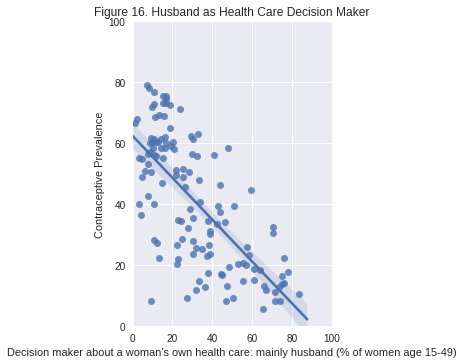

In [56]:
#Decision made by husband
m = sns.FacetGrid(bcall, size=5)  
m.map(sns.regplot, "Decision maker about a woman's own health care: mainly husband (% of women age 15-49)", "Contraceptive prevalence, any methods (% of women ages 15-49)")  
plt.xlim(0, 100)  
plt.ylim(0, 100) 
sns.plt.title('Figure 16. Husband as Health Care Decision Maker')
plt.ylabel('Contraceptive Prevalence')
savefig('husband.png')

(0, 100)

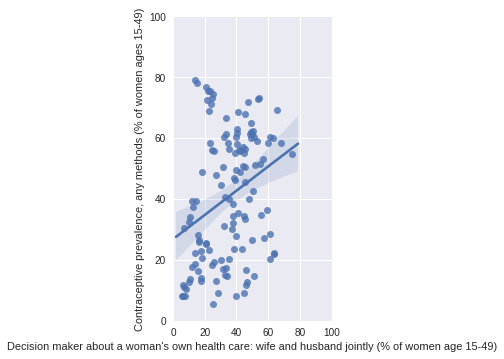

In [42]:
#decision made by wife and husband
j = sns.FacetGrid(bcall, size=5)  
j.map(sns.regplot, "Decision maker about a woman's own health care: wife and husband jointly (% of women age 15-49)", "Contraceptive prevalence, any methods (% of women ages 15-49)")  
plt.xlim(0, 100)  
plt.ylim(0, 100) 

## Public Health Spending vs Contraceptive use

(0, 100)

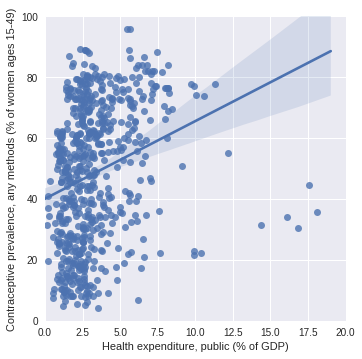

In [48]:
#Reg plot of Public Health Spending vs Contraceptive use
heal = sns.FacetGrid(bcall, size=5)  
heal.map(sns.regplot, "Health expenditure, public (% of GDP)", "Contraceptive prevalence, any methods (% of women ages 15-49)")  
plt.xlim(0, 20)  
plt.ylim(0, 100) 

### There appears to be a positive correlation between public health spending and contraceptive.

### A slight negative correlation was found between No Schooling and Contraceptive use.

(0, 100)

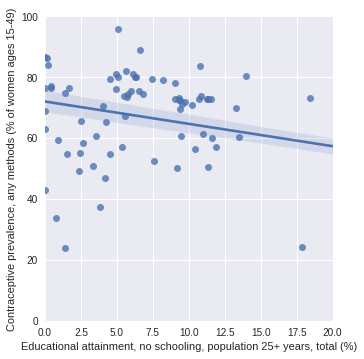

In [57]:
noschool = sns.FacetGrid(bcall, size=5)  
noschool.map(sns.regplot, "Educational attainment, no schooling, population 25+ years, total (%)", "Contraceptive prevalence, any methods (% of women ages 15-49)")  
plt.xlim(0, 20)  
plt.ylim(0, 100) 

### There's also a nslight positive correlation between Bachelor's degree achievement and Contraceptive use.

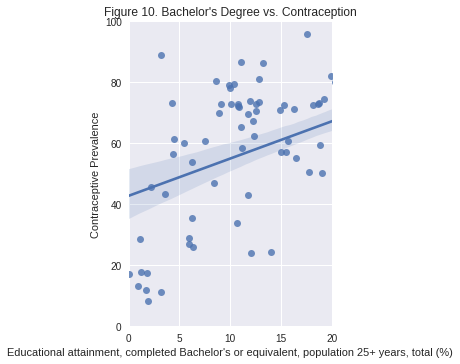

In [46]:
bachelors = sns.FacetGrid(bcall, size=5)  
bachelors.map(sns.regplot, "Educational attainment, completed Bachelor's or equivalent, population 25+ years, total (%)", "Contraceptive prevalence, any methods (% of women ages 15-49)")  
plt.xlim(0, 20)  
plt.ylim(0, 100) 
plt.ylabel('Contraceptive Prevalence')
sns.plt.title('Figure 10. Bachelor\'s Degree vs. Contraception')
savefig('bachbc.png')

## And a much stronger correlation was found between Female Literacy and Contraceptive use.

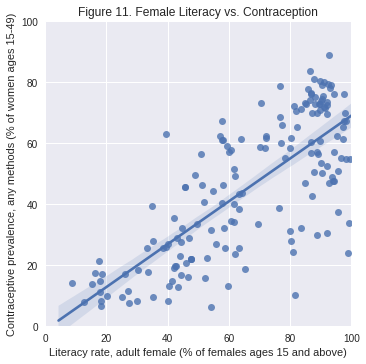

In [5]:
fliteracy = sns.FacetGrid(bcall, size=5)  
fliteracy.map(sns.regplot, "Literacy rate, adult female (% of females ages 15 and above)", "Contraceptive prevalence, any methods (% of women ages 15-49)")
plt.xlim(0, 100)  
plt.ylim(0, 100)
sns.plt.title('Figure 11. Female Literacy vs. Contraception')
savefig('femlitbc.png')

### And male literacy as well

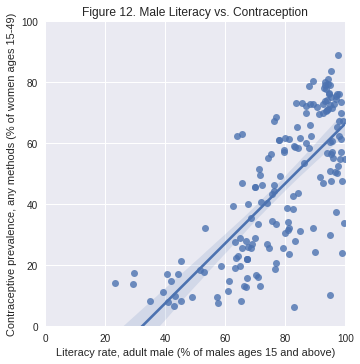

In [6]:
fliteracy = sns.FacetGrid(bcall, size=5)  
fliteracy.map(sns.regplot, "Literacy rate, adult male (% of males ages 15 and above)", "Contraceptive prevalence, any methods (% of women ages 15-49)")
plt.xlim(0, 100)  
plt.ylim(0, 100)
sns.plt.title('Figure 12. Male Literacy vs. Contraception')
savefig('mlitbc.png')

### There's also a slight correlation between Female Bachelor degree achievement and Life Expectancy


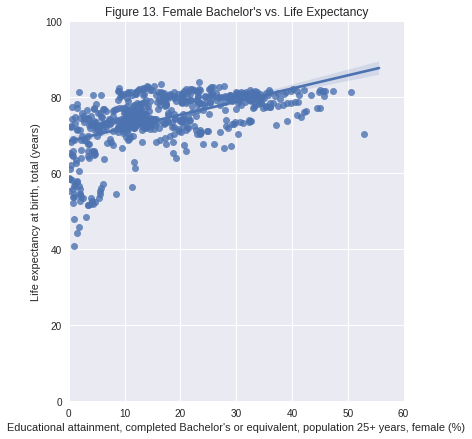

In [7]:
life = sns.FacetGrid(df, size=6)  
life.map(sns.regplot, "Educational attainment, completed Bachelor's or equivalent, population 25+ years, female (%)", "Life expectancy at birth, total (years)")  
plt.xlim(0, 60)  
plt.ylim(0, 100) 
sns.plt.title('Figure 13. Female Bachelor\'s vs. Life Expectancy')
savefig('fembachlife.png')

## As well as GDP (per capita)

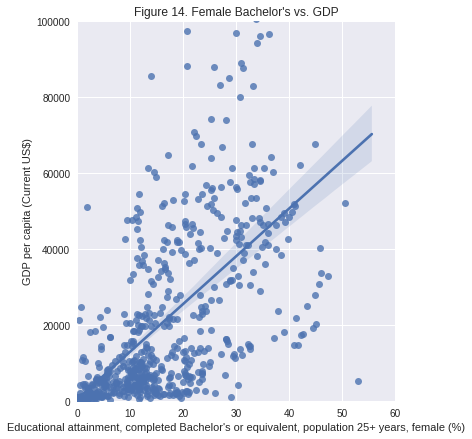

In [50]:
gdp = sns.FacetGrid(df, size=6)  
gdp.map(sns.regplot, "Educational attainment, completed Bachelor's or equivalent, population 25+ years, female (%)", "GDP per capita (Current US$)")  
plt.xlim(0, 60)  
plt.ylim(0, 100000) 
sns.plt.title('Figure 14. Female Bachelor\'s vs. GDP')
savefig('fembachgdp.png')

## Bachelor's degree achievement between Males and Females is (not suprisingly) highly correlated

(0, 60)

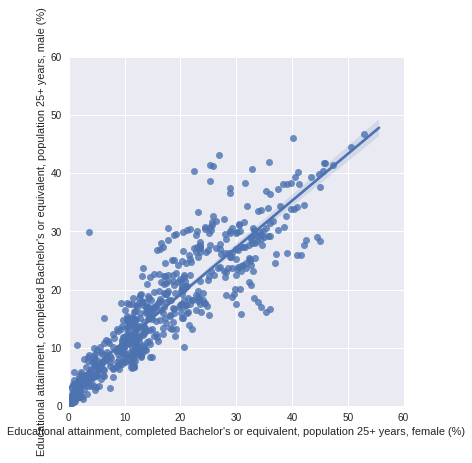

In [102]:
male = sns.FacetGrid(df, size=6)  
male.map(sns.regplot, "Educational attainment, completed Bachelor's or equivalent, population 25+ years, female (%)", "Educational attainment, completed Bachelor's or equivalent, population 25+ years, male (%)")  
plt.xlim(0, 60)  
plt.ylim(0, 60) 

### But unexpectedly, a NEGATIVE correlation was found between Female Bachelor's degree achievement and Male primary school completion. It may be that the statistics measures males who ONLY completed primary school, and not everyone who finished primary school.

(0, 60)

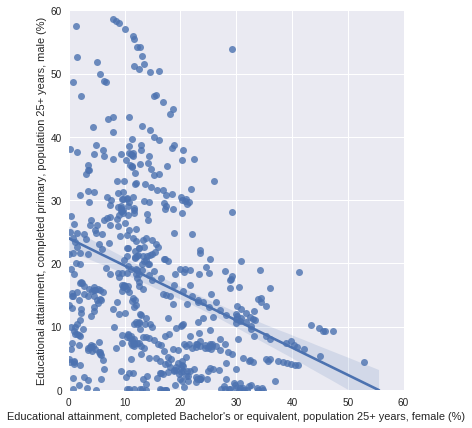

In [101]:
maleprim = sns.FacetGrid(df, size=6)  
maleprim.map(sns.regplot, "Educational attainment, completed Bachelor's or equivalent, population 25+ years, female (%)", "Educational attainment, completed primary, population 25+ years, male (%)")  
plt.xlim(0, 60)  
plt.ylim(0, 60) 

## A weak negative correlation was found between Male bachelor's degree achievement and physical/sexual abuse of women.

(0, 30)

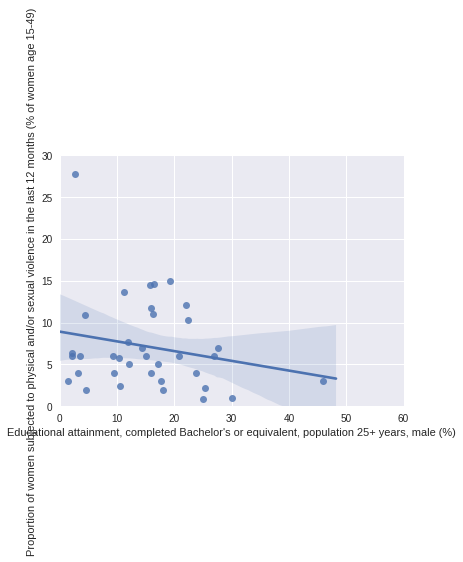

In [139]:
abusemaleschool = sns.FacetGrid(df, size=6)  
abusemaleschool.map(sns.regplot, "Educational attainment, completed Bachelor's or equivalent, population 25+ years, male (%)", "Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of women age 15-49)")  
plt.xlim(0, 60)  
plt.ylim(0, 30) 

## While a slightly stronger postive correlation was found between No Schooling of males and physical/sexual abuse of women.

(0, 30)

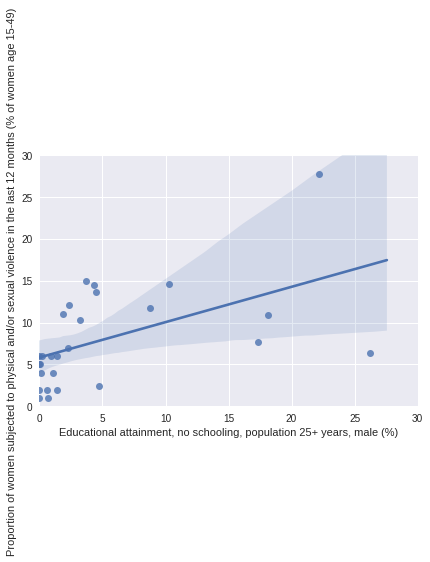

In [111]:
abusenoschool = sns.FacetGrid(df, size=6)  
abusenoschool.map(sns.regplot, "Educational attainment, no schooling, population 25+ years, male (%)", "Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of women age 15-49)")  
plt.xlim(0, 30)  
plt.ylim(0, 30) 

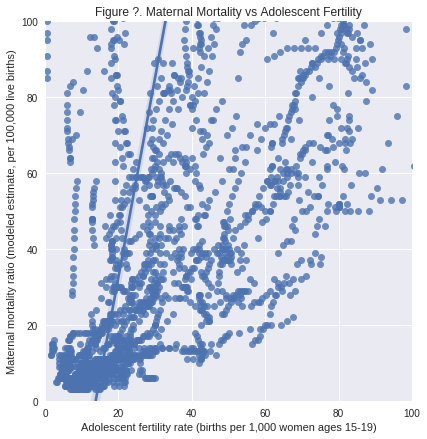

In [12]:
b = sns.FacetGrid(df, size=6)  
b.map(sns.regplot, "Adolescent fertility rate (births per 1,000 women ages 15-19)", "Maternal mortality ratio (modeled estimate, per 100,000 live births)")  
plt.xlim(0, 100)  
plt.ylim(0, 100)
sns.plt.title('Figure ?. Maternal Mortality vs Adolescent Fertility')

# Conclusion

The most compelling correlation found was between the decision maker of a woman's health choices and the use of any method of Contraception. There is a positive correlation when a wife makes her own decision, and a negative correlation when the husband makes these decisions. Autonomy over health decisions has a huge impact on quality of life and success outcomes. 

Another strong correlation was that between Contraceptive Use (Any method) and Life Expectancy. The correlation may be due simply to affluence, but it is noteworthy either way.

The distribution of female legislators just scratched the surface. Since female lawmakers are much more likely to make policy that positively affects women, it is hypothesized that certain economic, education and health factors for women may correlate with an increase in female legislators,  managers, etc. More analysis/correlations need to be run to establish if there is any effect.

Maternal Mortality rate is extremely prevalent in Sub-Saharan Africa. Analyses could be run on the region as a whole or the individual countries in order to establish whether Maternal Mortality is most closely related to health issues, social issues, or simply economic issues.

There is a strong correlation between Female Literacy and the use of Contraception. This suggests that one of the more effective ways to combat poverty and overpopulation issues is to teach women and girls how to read. Once literacy is established, a person can go on to teach themselves things, without having to rely on others solo for their information.

A clear negative correlation was found between Contraceptive use and Adolescent fertility rate. This may be caused by affluence or culture, but the two topics seems as though they could very well be causational.